In [100]:
# 3rd Party Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
import matplotlib as plt
import geopandas as gpd
from shapely.geometry import Point

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)


In [101]:
data = pd.read_csv("../2_data_cleaning/cleaned_csv/combined_data.csv")
data.drop(data.columns[0], axis=1,inplace=True)
data.head()

,price,address,mls,sqft,Community,beds,baths,Building Type,Air Conditioning,Heating Type,No amenity,Party/Meeting Room,Gym,Rooftop Deck/Garden,Balcony,Pool,Exercise Room,Sauna,Guest Suites,Party Room,Storage - Locker,Exercise Centre,Bbqs Allowed,Security/Concierge,Concierge,Visitor Parking,Recreation Room,geometry,ROUTE_NAME,RID,distance_to_subway,School Name,EQAO % at Levels 3/4,OSSLT % Successful,Fraiser Score,distance_to_school,total_area_within_800m,Neighbourhood,ASSAULT_NORM,AUTOTHEFT_NORM,BIKETHEFT_NORM,BREAKENTER_NORM,HOMICIDE_NORM,ROBBERY_NORM,SHOOTING_NORM,THEFT_MV_NORM,THEFT_OV_NORM,CRIME_PCA1,CRIME_PCA2
0,888000.0,1515 - 8 HILLCREST AVENUEToronto (Willowdale E...,C10650046,1099.5,Willowdale East,3.0,2.0,Apartment,Central air conditioning,Forced air (Natural gas),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,POINT (-5291975.0035093995 10508775.52882338),LINE 1 (YONGE-UNIVERSITY),1.0,69.549883,Earl Haig Secondary School,68.0,92.0,7.9,730.309818,0.067556,Yonge-Doris,0.009387,0.002626,0.001922,0.001709,0.000011,0.001930,0.000000,0.006353,0.001086,-1.897073,0.895009
1,639000.0,1502 - 10 YORK STREETToronto (Waterfront Commu...,C10640404,549.5,Waterfront Communities C1,1.0,1.0,Apartment,Central air conditioning,Forced air (Natural gas),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,POINT (-5312523.776786815 10507452.60627656),LINE 1 (YONGE-UNIVERSITY),1.0,684.265472,Jarvis Collegiate Institute,36.0,81.0,5.1,4007.190133,0.016200,Harbourfront-CityPlace,0.014123,0.001353,0.007390,0.004434,0.000020,0.001343,0.000197,0.004971,0.001118,-1.528335,1.056112
2,399900.0,"708 - 60 TOWN CENTRE COURTToronto (Bendale), O...",E10541395,649.5,Bendale,2.0,1.0,Apartment,Central air conditioning,Forced air (Natural gas),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,POINT (-5293066.20857235 10490723.327922672),LINE 3 (SCARBOROUGH),3.0,208.924251,Woburn Collegiate Institute,59.0,82.0,6.9,3299.426757,0.026428,Bendale-Glen Andrew,0.024337,0.008089,0.001025,0.004644,0.000087,0.006977,0.000491,0.008583,0.001507,-0.011734,-0.491790
3,855000.0,"506 - 12 REAN DRIVEToronto (Bayview Village), ...",C10511289,1299.5,Bayview Village,2.0,2.0,Apartment,Central air conditioning,Forced air (Natural gas),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,POINT (-5292544.869869862 10505467.139511295),LINE 4 (SHEPPARD),4.0,167.485449,York Mills Collegiate Institute,71.0,92.0,8.3,2605.785570,0.103265,Bayview Village,0.008827,0.003503,0.001654,0.004093,0.000020,0.000920,0.000139,0.005612,0.000952,-1.863530,0.635934
4,2749000.0,"12 EUCLID AVENUEToronto (Highland Creek), Onta...",E10477077,4250.0,Highland Creek,4.0,6.5,Detached,Central air conditioning,Forced air (Natural gas),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,POINT (-5290767.794685134 10480917.276191738),LINE 3 (SCARBOROUGH),3.0,9442.629702,West Hill Collegiate Institute,27.0,77.0,4.7,3555.528957,0.162422,Highland Creek,0.017011,0.007706,0.001586,0.007352,0.000092,0.003262,0.000244,0.010117,0.000646,-0.661818,-0.115449


In [102]:
data.shape

(3820, 49)

In [103]:
print(data.columns)
data.info()

Index(['price', 'address', 'mls', 'sqft', 'Community', 'beds', 'baths',
       'Building Type', 'Air Conditioning', 'Heating Type', 'No amenity',
       'Party/Meeting Room', 'Gym', 'Rooftop Deck/Garden', 'Balcony', 'Pool',
       'Exercise Room', 'Sauna', 'Guest Suites', 'Party Room',
       'Storage - Locker', 'Exercise Centre', 'Bbqs Allowed',
       'Security/Concierge', 'Concierge', 'Visitor Parking', 'Recreation Room',
       'geometry', 'ROUTE_NAME', 'RID', 'distance_to_subway', 'School Name',
       'EQAO % at Levels 3/4', 'OSSLT % Successful', 'Fraiser Score',
       'distance_to_school', 'total_area_within_800m', 'Neighbourhood',
       'ASSAULT_NORM', 'AUTOTHEFT_NORM', 'BIKETHEFT_NORM', 'BREAKENTER_NORM',
       'HOMICIDE_NORM', 'ROBBERY_NORM', 'SHOOTING_NORM', 'THEFT_MV_NORM',
       'THEFT_OV_NORM', 'CRIME_PCA1', 'CRIME_PCA2'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3820 entries, 0 to 3819
Data columns (total 49 columns):
 #   Column       

### Let's check if there's any missing data

In [104]:
# Calculate missing values percentage
missing_data = data.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_data / len(data)) * 100

# Display missing data summary
print(missing_percentage[missing_percentage > 0])  # Only show columns with missing data


Air Conditioning    4.109948
Heating Type        0.759162
Community           0.732984
Building Type       0.157068
dtype: float64


<Axes: >

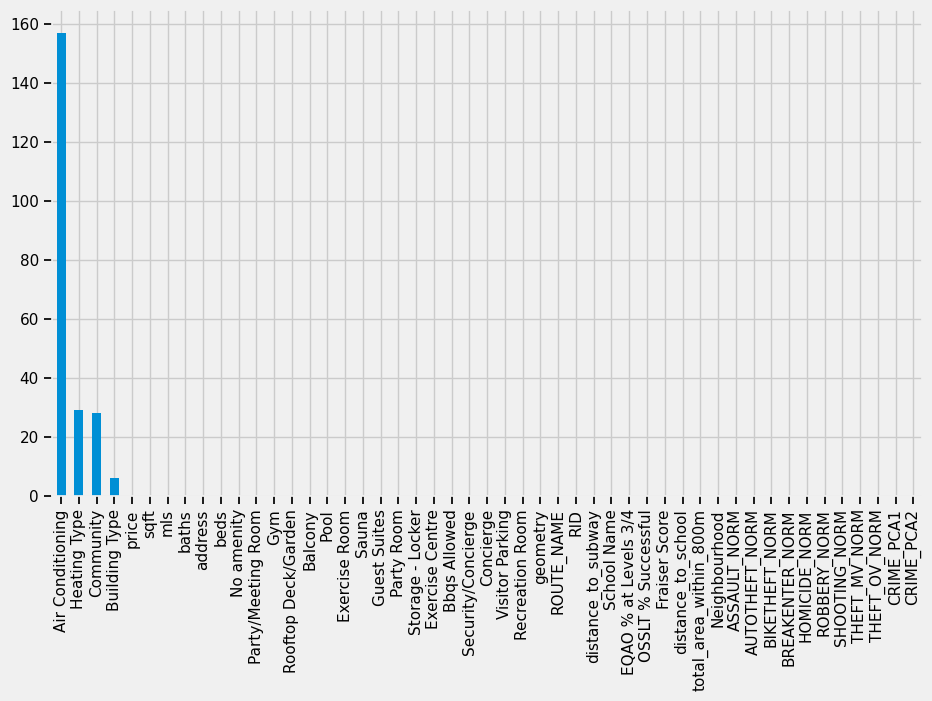

In [105]:
missing_data.plot(kind='bar', figsize=(10, 6))
# plt.title('Missing Data per Column')
# plt.xlabel('Columns')
# plt.ylabel('Number of Missing Values')
# plt.show()


In [106]:
data.describe()


,price,sqft,beds,baths,No amenity,Party/Meeting Room,Gym,Rooftop Deck/Garden,Balcony,Pool,Exercise Room,Sauna,Guest Suites,Party Room,Storage - Locker,Exercise Centre,Bbqs Allowed,Security/Concierge,Concierge,Visitor Parking,Recreation Room,RID,distance_to_subway,EQAO % at Levels 3/4,OSSLT % Successful,Fraiser Score,distance_to_school,total_area_within_800m,ASSAULT_NORM,AUTOTHEFT_NORM,BIKETHEFT_NORM,BREAKENTER_NORM,HOMICIDE_NORM,ROBBERY_NORM,SHOOTING_NORM,THEFT_MV_NORM,THEFT_OV_NORM,CRIME_PCA1,CRIME_PCA2
count,3.820000e+03,3.820000e+03,3820.000000,3820.000000,3820.000000,3820.000000,3820.0,3820.000000,3820.000000,3820.000000,3820.000000,3820.000000,3820.0,3820.000000,3820.000000,3820.0,3820.000000,3820.000000,3820.000000,3820.000000,3820.000000,3820.000000,3820.000000,3820.000000,3820.000000,3820.000000,3820.000000,3820.000000,3820.000000,3820.000000,3820.000000,3820.000000,3820.000000,3820.000000,3820.000000,3820.000000,3820.000000,3820.000000,3820.000000
mean,1.677618e+06,2.122059e+03,3.141099,2.755628,0.272251,0.001047,0.0,0.000524,0.051309,0.040314,0.000785,0.000262,0.0,0.000262,0.024346,0.0,0.001047,0.000785,0.000524,0.008115,0.000262,1.891361,2811.132845,49.417016,84.032461,6.160838,2029.326959,0.615036,0.021089,0.006058,0.004577,0.008200,0.000078,0.003480,0.000347,0.009693,0.001418,-0.276771,0.189841
std,2.200849e+06,2.651705e+04,1.648549,1.718286,0.445177,0.032347,0.0,0.022878,0.220656,0.196721,0.028017,0.016180,0.0,0.016180,0.154140,0.0,0.032347,0.028017,0.022878,0.089730,0.016180,0.983221,2637.199570,18.959796,10.644878,1.930785,976.036734,8.389185,0.018293,0.004276,0.008102,0.005459,0.000080,0.003258,0.000377,0.006262,0.001237,2.060287,1.017889
min,1.000000e+00,-3.101144e+02,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.165225,0.000000,54.000000,1.300000,150.904310,0.000000,0.003998,0.001353,0.000140,0.001520,0.000000,0.000763,0.000000,0.002751,0.000249,-2.473728,-5.628648
25%,6.889720e+05,8.495000e+02,2.000000,2.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,780.557118,35.000000,79.000000,5.100000,1256.617306,0.000000,0.010886,0.003209,0.000927,0.004644,0.000020,0.001840,0.000105,0.006353,0.000776,-1.437283,-0.211755
50%,1.029950e+06,1.299500e+03,3.000000,2.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2063.661830,52.000000,86.000000,6.800000,1987.720492,0.000000,0.016319,0.004908,0.001654,0.007229,0.000059,0.002524,0.000225,0.008135,0.001122,-0.777898,0.373147
75%,1.749000e+06,1.899500e+03,4.000000,4.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3924.568529,65.000000,92.000000,7.700000,2728.174824,0.043262,0.024337,0.007461,0.005354,0.009992,0.000096,0.004082,0.000509,0.011204,0.001602,0.197635,0.687870
max,3.450000e+07,1.629495e+06,11.000000,16.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,14954.157489,93.000000,100.000000,9.300000,7031.632900,414.840551,0.150569,0.033589,0.099425,0.058676,0.000365,0.021921,0.002905,0.060592,0.012015,15.176457,5.955426


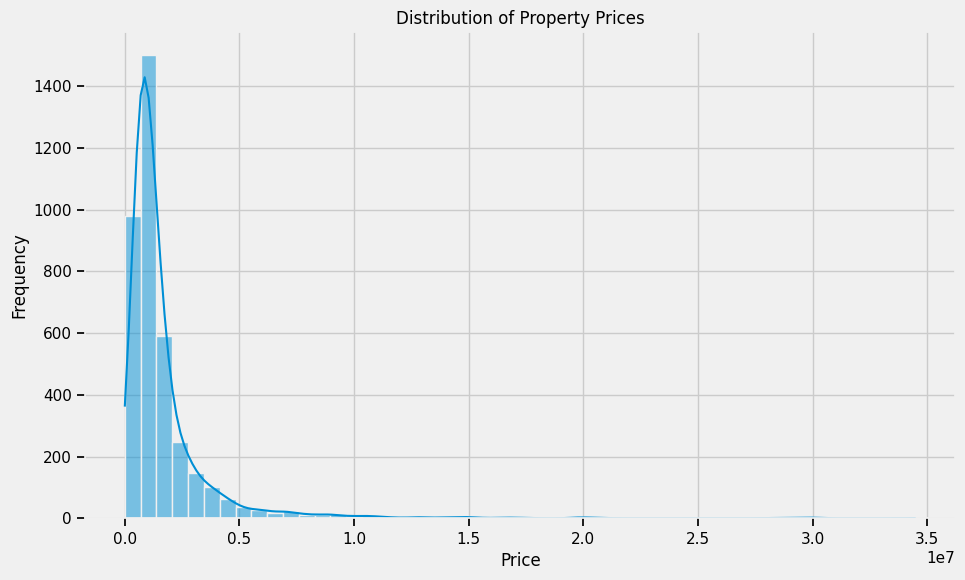

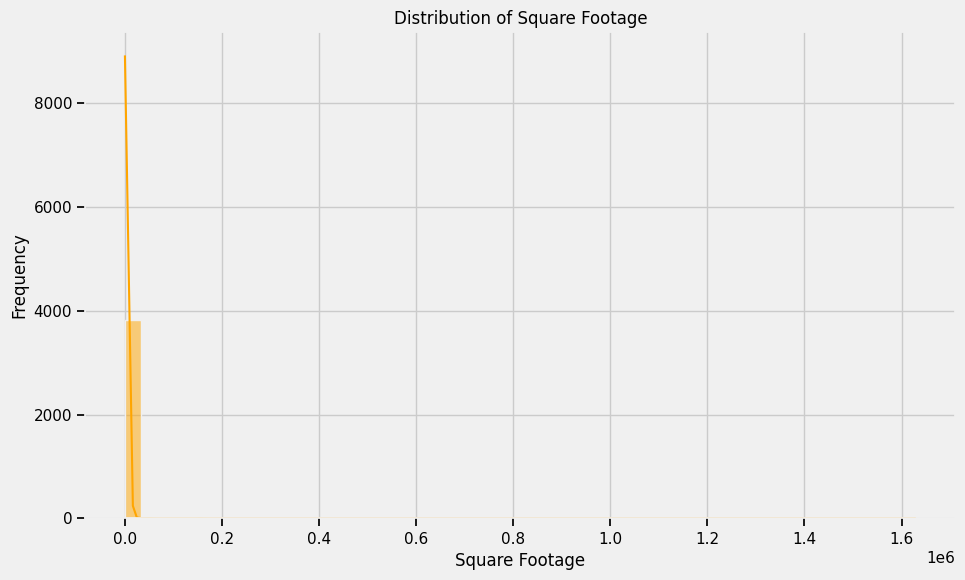

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

# Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=50, kde=True)
plt.title('Distribution of Property Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Square Footage Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['sqft'], bins=50, kde=True, color="orange")
plt.title('Distribution of Square Footage')
plt.xlabel('Square Footage')
plt.ylabel('Frequency')
plt.show()


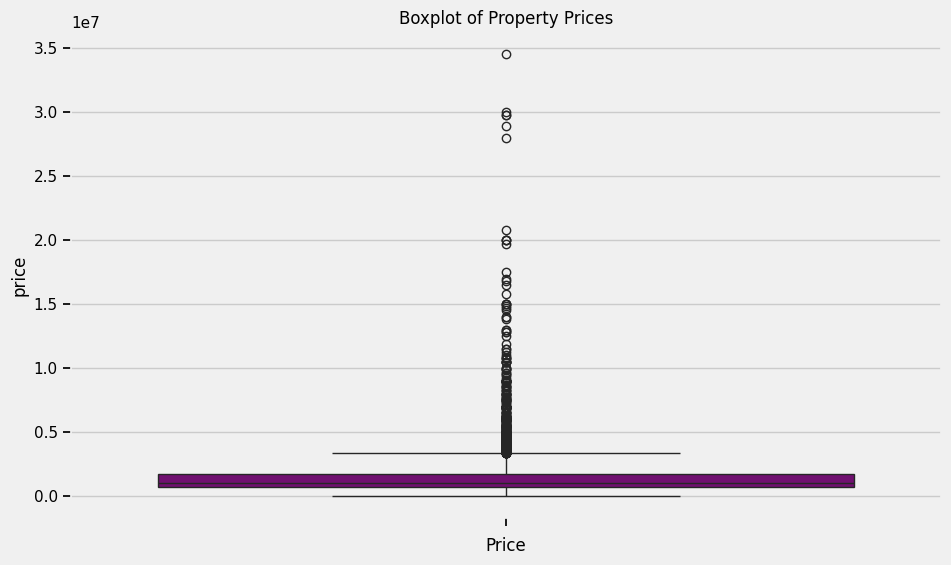

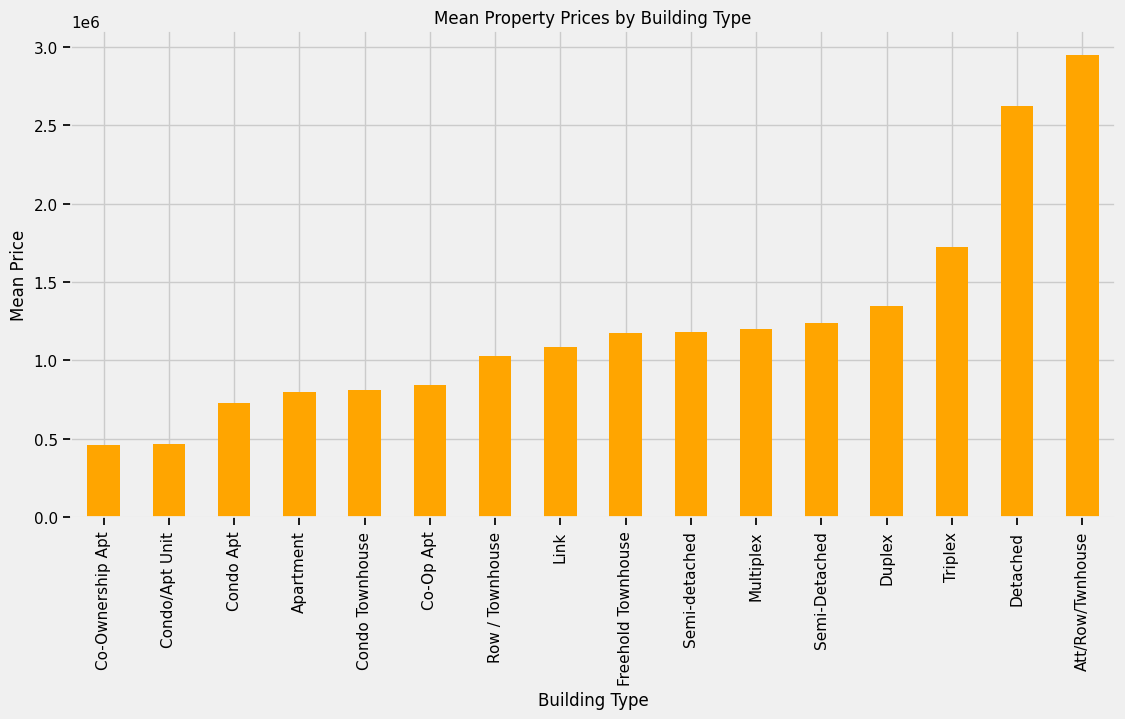

In [108]:
# Boxplot for Price
plt.figure(figsize=(10, 6))
sns.boxplot(data['price'], color='purple')
plt.title('Boxplot of Property Prices')
plt.xlabel('Price')
plt.show()

# Mean Price by Building Type
mean_price_by_building = data.groupby('Building Type')['price'].mean().sort_values()
plt.figure(figsize=(12, 6))
mean_price_by_building.plot(kind='bar', color='orange')
plt.title('Mean Property Prices by Building Type')
plt.xlabel('Building Type')
plt.ylabel('Mean Price')
plt.show()


Likely there are a lot of condos here

In [109]:
data['Building Type'].value_counts()

Building Type
Detached              1807
Condo Apt              969
Apartment              566
Semi-Detached          170
Condo Townhouse        111
Row / Townhouse         80
Freehold Townhouse      53
Semi-detached           28
Condo/Apt Unit           6
Co-Op Apt                6
Link                     5
Triplex                  4
Duplex                   4
Co-Ownership Apt         3
Att/Row/Twnhouse         1
Multiplex                1
Name: count, dtype: int64

Due to the lack of time and resources, we need to scope down. Since we are focusing on families with children who go to school through our socia questions "Does social infrastructure impact housing price?", we will scope down to houses and exclude condos and apt. This decision is also driven by the fact that condos and apartments differ significantly in their sales dynamics, which would require a separate predictive model. 

We acknowledge potential equity concerns associated with this choice, as our model completely excludes those who cannot afford houses. However reducing scope is necessary given our cuurent constraints. If we had additional time and resources, we would look to address the equipty concerns, as th

In [110]:
filtered_data = data[~data['Building Type'].str.contains('condo|apt|Apartment', case=False, na=False)]


### Let's do some data cleaning
some of theses are clearly wrong. For example, it is impossible squarefeet is negative. and there has to be at least one bathroom unless this is a piece of land.

In [111]:
filtered_data['sqft'] = filtered_data['sqft'].clip(lower=0)  # Replace negative values with 0

# Step 2: Remove outliers from the 'price' column using the IQR method
Q1 = filtered_data['price'].quantile(0.25)  # First quartile
Q3 = filtered_data['price'].quantile(0.75)  # Third quartile
IQR = Q3 - Q1  # Interquartile range

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to exclude outliers
filtered_data = filtered_data[(filtered_data['price'] >= lower_bound) & (filtered_data['price'] <= upper_bound)]

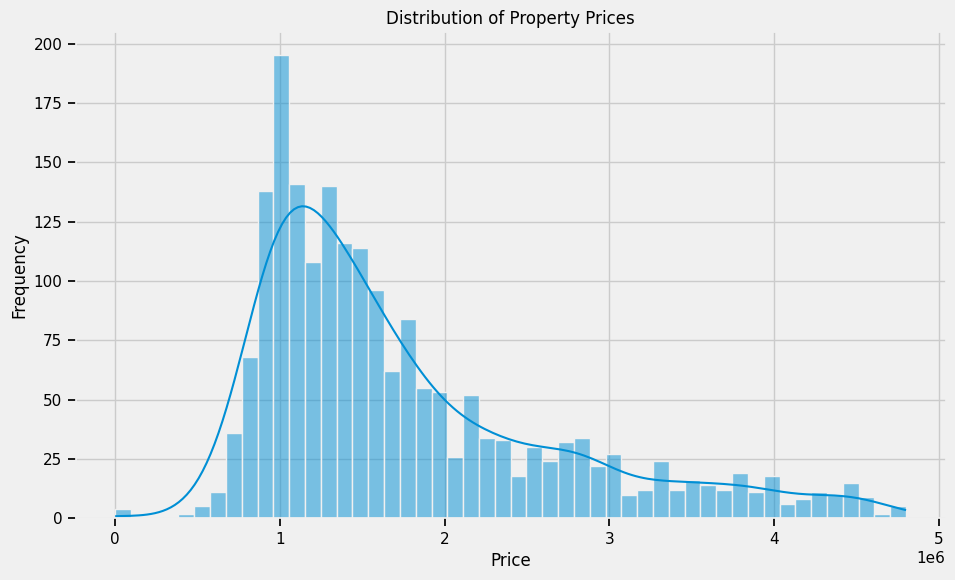

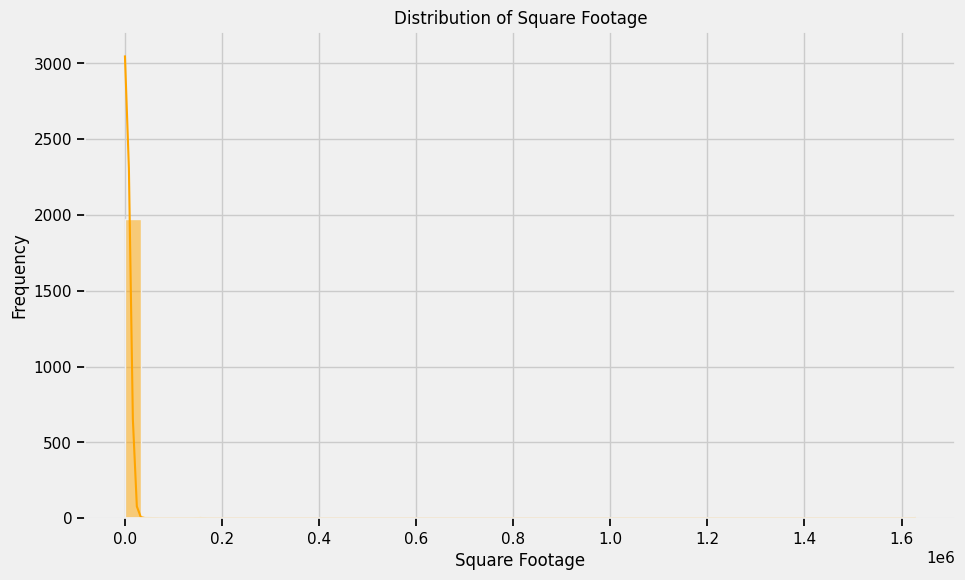

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

# Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['price'], bins=50, kde=True)
plt.title('Distribution of Property Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Square Footage Distribution
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['sqft'], bins=50, kde=True, color="orange")
plt.title('Distribution of Square Footage')
plt.xlabel('Square Footage')
plt.ylabel('Frequency')
plt.show()


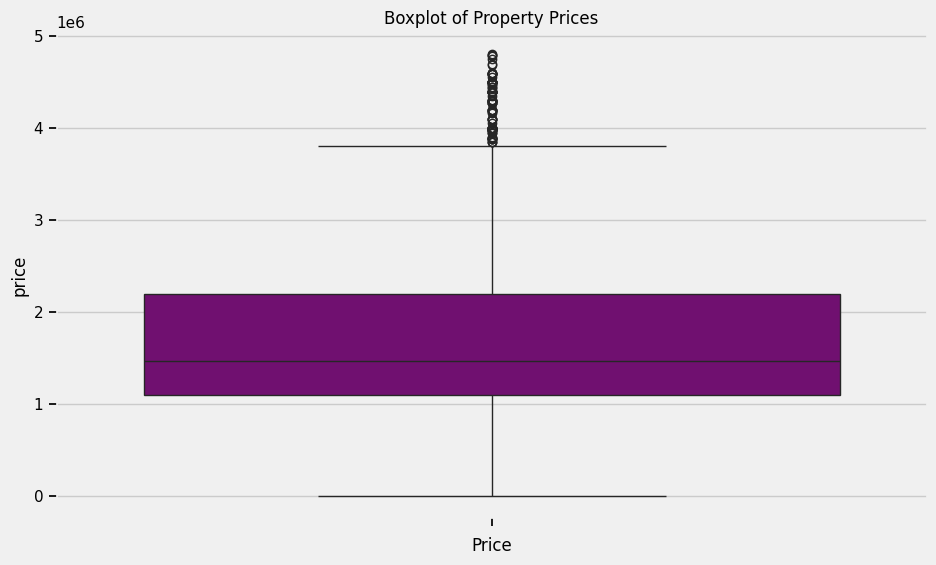

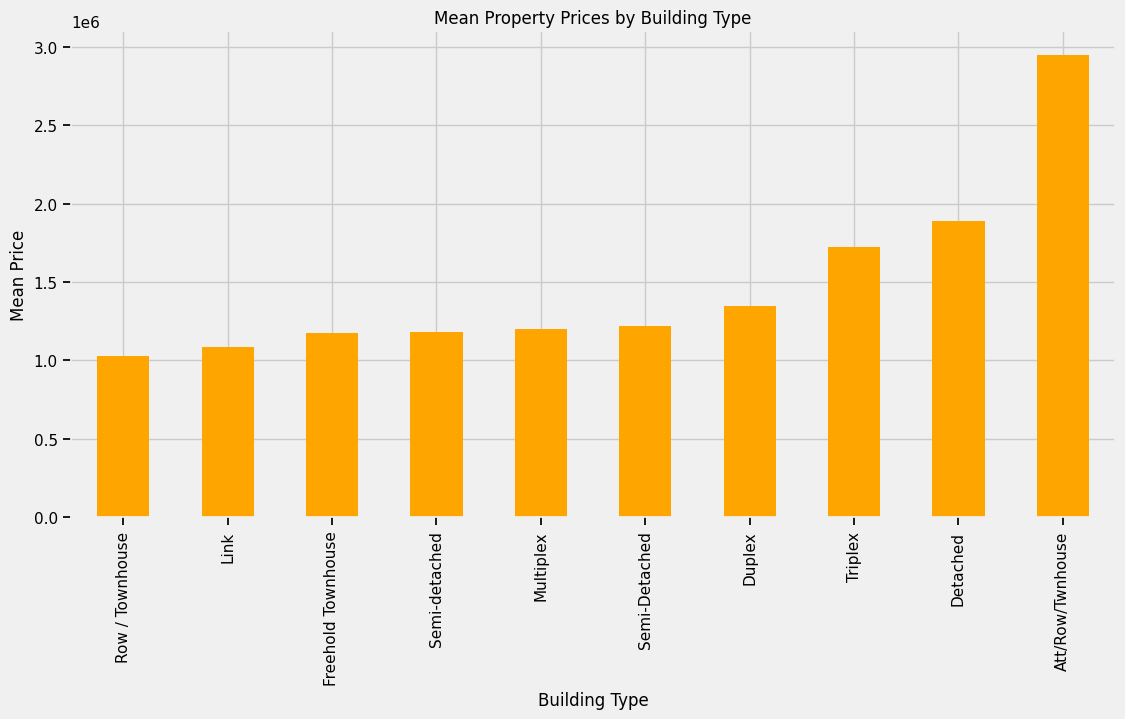

In [113]:
# Boxplot for Price
plt.figure(figsize=(10, 6))
sns.boxplot(filtered_data['price'], color='purple')
plt.title('Boxplot of Property Prices')
plt.xlabel('Price')
plt.show()

# Mean Price by Building Type
mean_price_by_building = filtered_data.groupby('Building Type')['price'].mean().sort_values()
plt.figure(figsize=(12, 6))
mean_price_by_building.plot(kind='bar', color='orange')
plt.title('Mean Property Prices by Building Type')
plt.xlabel('Building Type')
plt.ylabel('Mean Price')
plt.show()


Visually, it doesn't look like much has changed!

In [114]:
filtered_data.describe()

,price,sqft,beds,baths,No amenity,Party/Meeting Room,Gym,Rooftop Deck/Garden,Balcony,Pool,Exercise Room,Sauna,Guest Suites,Party Room,Storage - Locker,Exercise Centre,Bbqs Allowed,Security/Concierge,Concierge,Visitor Parking,Recreation Room,RID,distance_to_subway,EQAO % at Levels 3/4,OSSLT % Successful,Fraiser Score,distance_to_school,total_area_within_800m,ASSAULT_NORM,AUTOTHEFT_NORM,BIKETHEFT_NORM,BREAKENTER_NORM,HOMICIDE_NORM,ROBBERY_NORM,SHOOTING_NORM,THEFT_MV_NORM,THEFT_OV_NORM,CRIME_PCA1,CRIME_PCA2
count,1.974000e+03,1.974000e+03,1974.000000,1974.000000,1974.000000,1974.0,1974.0,1974.0,1974.000000,1974.000000,1974.0,1974.000000,1974.0,1974.0,1974.000000,1974.0,1974.0,1974.0,1974.0,1974.000000,1974.0,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000
mean,1.762052e+06,2.955858e+03,4.026849,3.290527,0.385005,0.0,0.0,0.0,0.004559,0.039514,0.0,0.000507,0.0,0.0,0.004559,0.0,0.0,0.0,0.0,0.003546,0.0,2.015198,3429.052190,49.388551,84.275076,6.233789,1927.375107,0.788884,0.018734,0.006783,0.002848,0.007747,0.000079,0.003381,0.000374,0.009713,0.001209,-0.440951,-0.028643
std,9.216906e+05,3.684488e+04,1.325713,1.429476,0.486720,0.0,0.0,0.0,0.067385,0.194863,0.0,0.022507,0.0,0.0,0.067385,0.0,0.0,0.0,0.0,0.059459,0.0,0.962959,2810.248162,19.920279,10.459238,1.913276,923.358294,11.140160,0.012124,0.004474,0.005750,0.004553,0.000077,0.002278,0.000412,0.005246,0.000918,1.580805,1.045796
min,1.000000e+00,1.022743e+02,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,1.000000,23.963609,0.000000,54.000000,1.300000,151.997653,0.000000,0.003998,0.001395,0.000140,0.001520,0.000000,0.000763,0.000000,0.002751,0.000249,-2.473728,-5.628648
25%,1.098000e+06,1.300000e+03,3.000000,2.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,1.000000,1298.876426,33.000000,77.000000,4.900000,1245.497525,0.000000,0.009833,0.004029,0.000809,0.004735,0.000026,0.002004,0.000106,0.006768,0.000714,-1.376367,-0.289561
50%,1.463000e+06,1.699500e+03,4.000000,3.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,2.000000,2567.933652,52.000000,86.000000,6.900000,1863.668447,0.000000,0.016083,0.005626,0.001351,0.007144,0.000062,0.002707,0.000246,0.008426,0.001014,-0.786332,0.237471
75%,2.195000e+06,2.250000e+03,5.000000,4.000000,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,3.000000,4721.978338,65.000000,92.000000,7.700000,2538.711283,0.046532,0.024455,0.007948,0.003380,0.009386,0.000096,0.004211,0.000513,0.011331,0.001392,0.089148,0.507047
max,4.800000e+06,1.629495e+06,11.000000,15.000000,1.000000,0.0,0.0,0.0,1.000000,1.000000,0.0,1.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,1.000000,0.0,4.000000,14954.157489,93.000000,100.000000,9.300000,7031.632900,414.840551,0.120914,0.033589,0.099425,0.058676,0.000365,0.021921,0.002905,0.060592,0.008604,15.176457,5.955426


A lot of these features are thing exclusive to condos, such as party rooms and rooftop deck, so it's ok to delete this for our analysis

In [115]:
#delete columns which only have 0 entries
filtered_data.drop(columns=['Party/Meeting Room','No amenity','Rooftop Deck/Garden','Gym','Exercise Room','Guest Suites','Exercise Centre','Bbqs Allowed','Concierge','Recreation Room'], inplace=True)

In [116]:
price_stats = data['price'].describe()
print("Summary Statistics for Price:")
print(price_stats)

Summary Statistics for Price:
count    3.820000e+03
mean     1.677618e+06
std      2.200849e+06
min      1.000000e+00
25%      6.889720e+05
50%      1.029950e+06
75%      1.749000e+06
max      3.450000e+07
Name: price, dtype: float64


Average house price in Toronto is 1 Million! This makes sense to wat you see on the news and stuff

## Correlation Heat Map

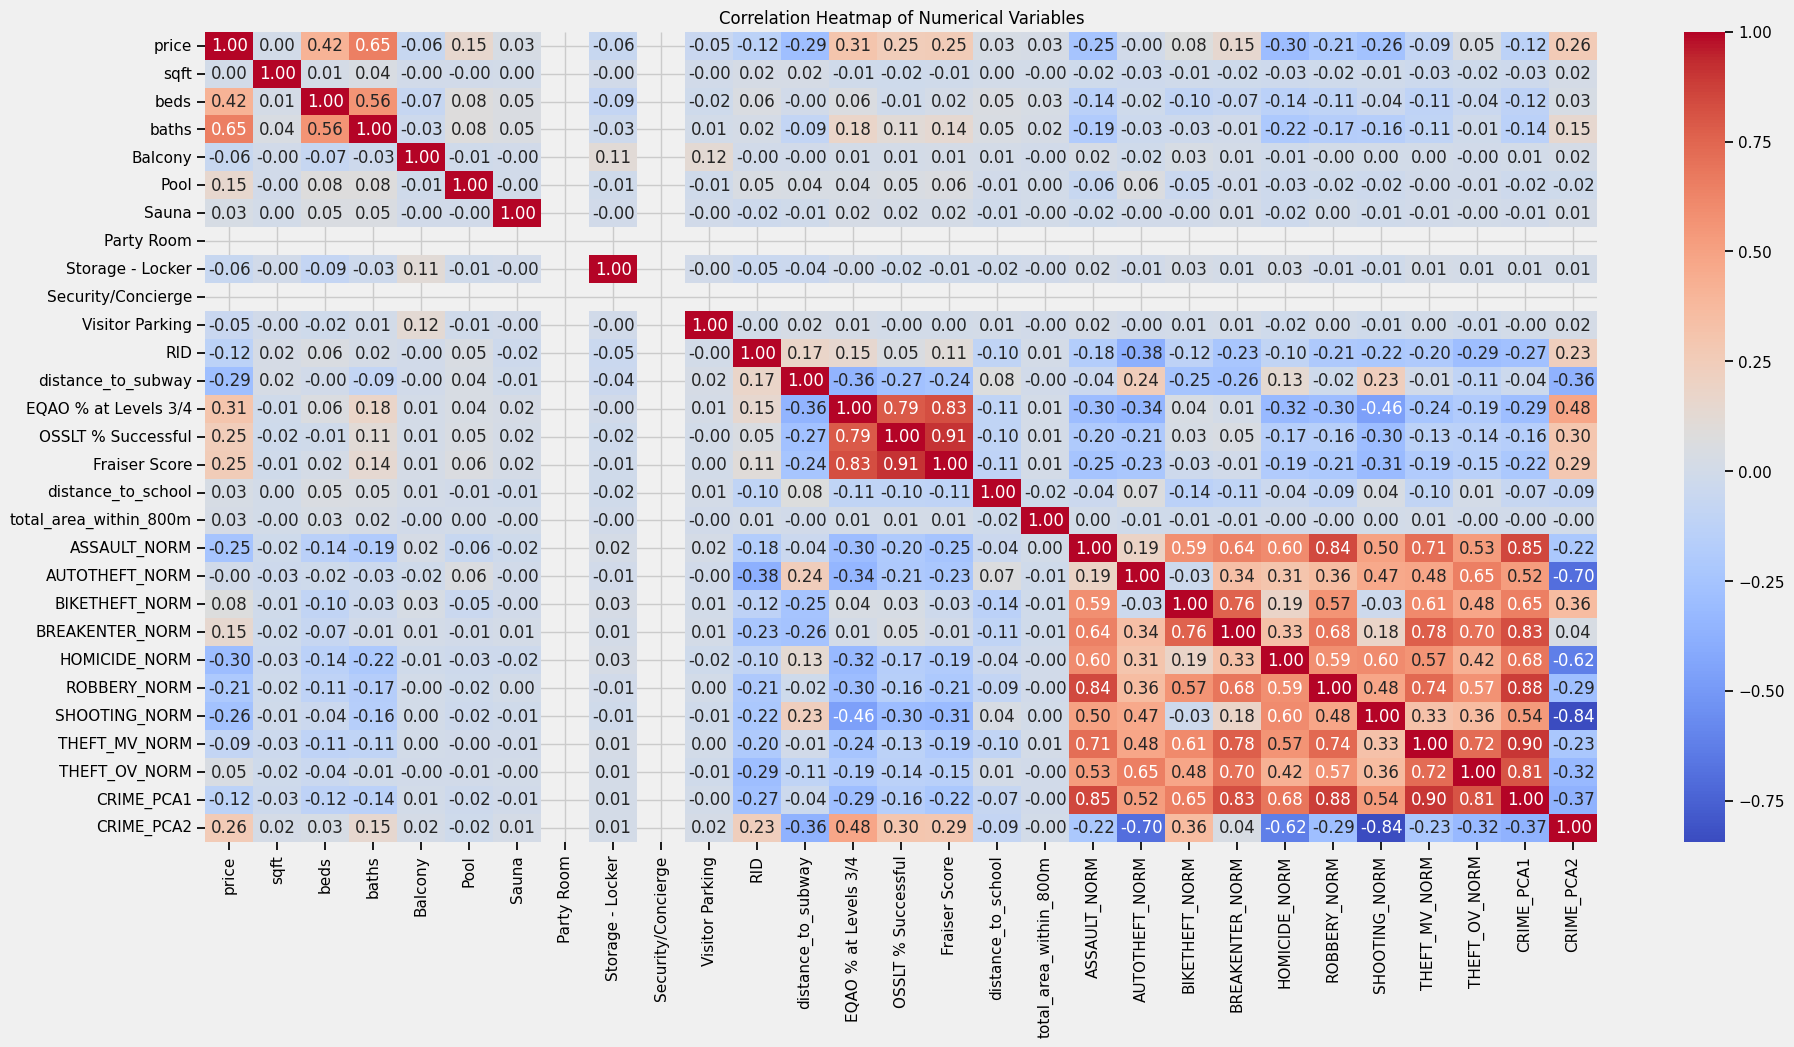

In [117]:
# Correlation heatmap
numerical_columns = filtered_data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(20, 10))
sns.heatmap(filtered_data[numerical_columns].corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


Because our question is social infrastructure impacts on housing prices, we should graph their correlations

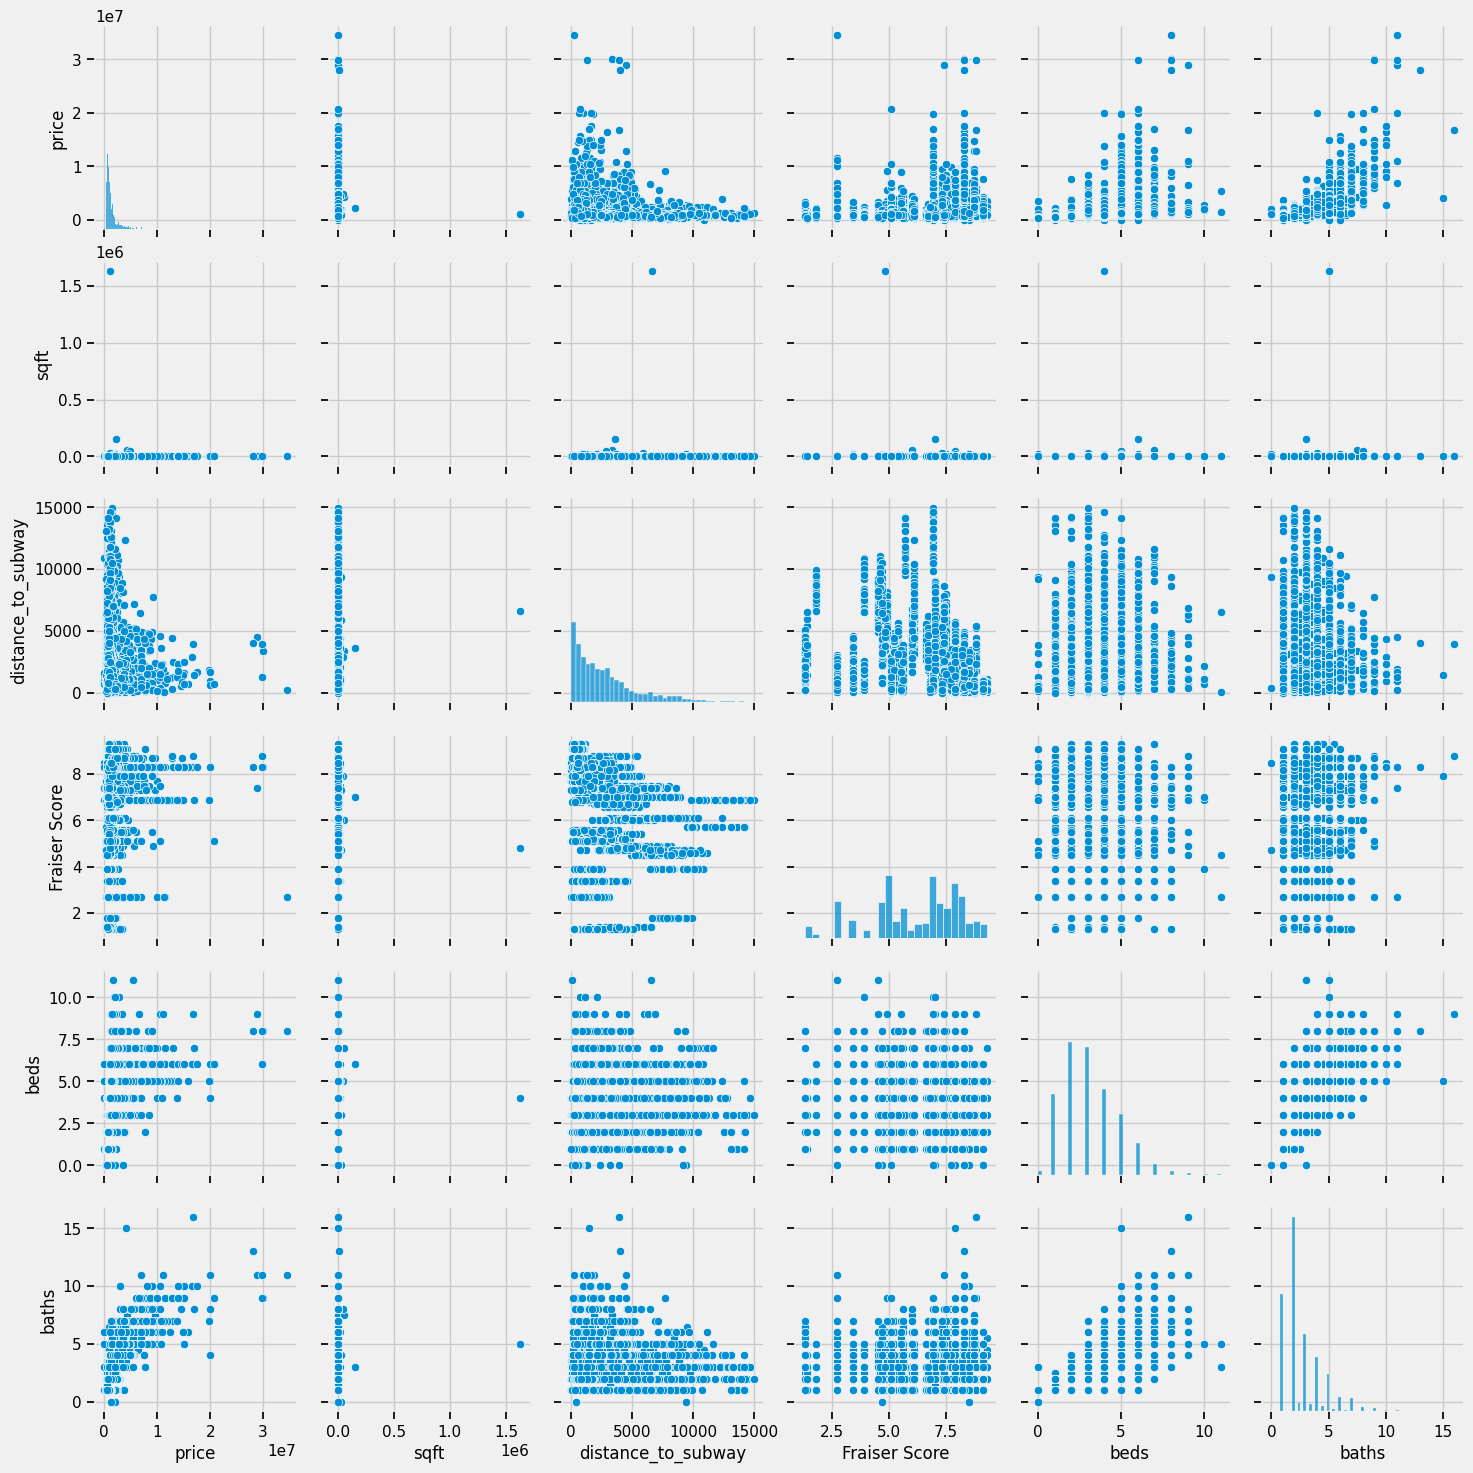

In [118]:
# Pairwise plot for selected features
selected_features = ['price', 'sqft', 'distance_to_subway', 'Fraiser Score', 'beds', 'baths']
sns.pairplot(data[selected_features])
plt.show()
